In [1]:
import pickle
import numpy as np
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu,floatX=float32"
import scipy.ndimage
import matplotlib.pyplot as plt
import pymc3 as pm
import math

In [2]:
track = pickle.load(open("mario_track_1.pkl"))

In [3]:
np.shape(track)

(347, 4)

In [4]:
def thresholds(vals, t_window=5):
    last_diff = 0
    last_diff_t = 0
    max_v = min(vals)
    min_v = max(vals)
    thresholds = set([0, min_v, max_v])
    for t, v in enumerate(vals):
        if (t - last_diff_t) == t_window:
            thresholds.add(last_diff)
        if v != last_diff:
            last_diff = v
            last_diff_t = t
    return thresholds

axis = 2
window = 3

velocities = track[1:,axis]-track[:-1,axis] 
print velocities
print np.convolve(velocities, np.ones(window)/window, mode='valid')

thresholds(velocities)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

{-5.0, -4.0, -1.0, 0, 3.0, 4.0, 5.0}

In [5]:
def samey_intervals(vals, t_window=5):
    last_diff = 0
    last_diff_t = 0
    intervals = []
    for t, v in enumerate(vals):
        if ((t - last_diff_t) >= t_window) and v != last_diff:
            intervals.append(last_diff_t)
            intervals.append(t-1)
            intervals.append(t)
        if v != last_diff:
            last_diff = v
            last_diff_t = t
    return intervals

axis = 2
window = 2

velocities = track[1:,axis]-track[:-1,axis] 
smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(window)/window)

print velocities
print smoothed

print samey_intervals(velocities)
print samey_intervals(smoothed)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

In [6]:
def zero_crossings(vals):
    sign_intervals = []
    last_sign_change = 0
    vsigns = np.sign(vals)
    last_sign = vsigns[0]
    for t, v in enumerate(vsigns):
        if last_sign == 0:
            last_sign = v
        elif v == 0 or v == last_sign:
            continue
        elif v != last_sign:
            sign_intervals.append(last_sign_change)
            sign_intervals.append(t-1)
            sign_intervals.append(t)
            last_sign = v
            last_sign_change = t
    if t - 1 != last_sign_change:
        sign_intervals.append(last_sign_change)
        sign_intervals.append(t)
    return sign_intervals

axis = 2
window = 2

velocities = track[1:,axis]-track[:-1,axis] 
smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(window)/window)

print velocities
print smoothed

print zero_crossings(velocities)
print zero_crossings(smoothed)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

[0, 31, 32, 51, 52, 59, 60, 67, 68, 76, 77, 89, 90, 124, 125, 154, 155, 173, 174, 180, 181, 212, 213, 245, 246, 254, 255, 263, 264, 284, 285, 340, 341, 345]
[38, 51, 52, 131, 153, 154, 218, 245, 246, 294, 340, 341]


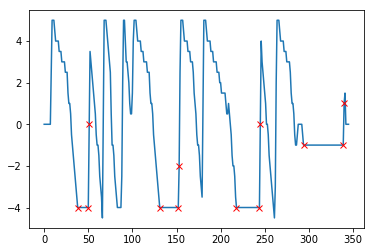

38 False
50 False
51 False
131 False
152 False
153 False
218 False
244 False
245 False
294 False
339 False
340 False
[38, 51, 52, 131, 153, 154, 218, 245, 246, 294, 340, 341]


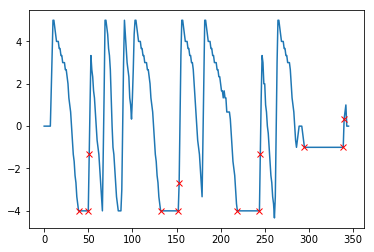

39 False
50 False
51 False
132 False
152 False
153 False
219 False
244 False
245 False
295 False
339 False
340 False
[38, 51, 52, 131, 153, 154, 218, 245, 246, 294, 340, 341]


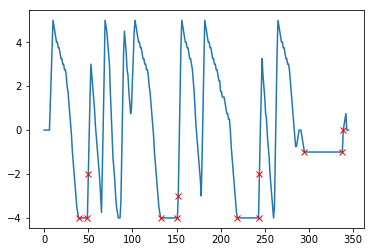

39 False
49 False
50 False
132 False
151 False
152 False
219 False
243 False
244 False
295 False
338 False
339 False
[38, 51, 52, 131, 153, 154, 218, 245, 246, 294, 340, 341]


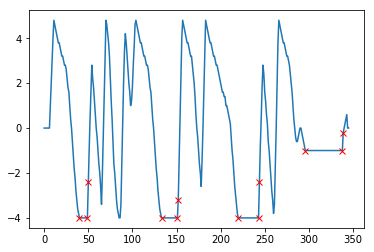

40 False
49 False
50 False
133 False
151 False
152 False
220 False
243 False
244 False
296 False
338 False
339 False
[38, 51, 52, 131, 153, 154, 218, 245, 246, 294, 340, 341]


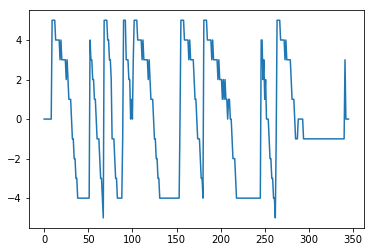

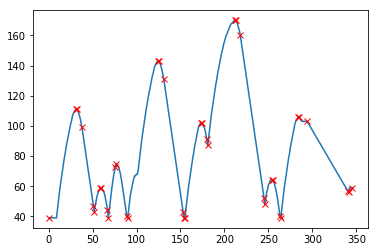

In [7]:
axis = 2

velocities = track[1:,axis]-track[:-1,axis] 

same_window = 10

switch_points = set(zero_crossings(velocities))
print sorted(switch_points)

smoothed_points = set(samey_intervals(velocities,t_window=same_window))
print sorted(smoothed_points)
for w in range(2,6):
    smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(w)/w)
    #print smoothed
    plt.plot(smoothed)
    
    points = samey_intervals(smoothed,t_window=same_window)
    plt.plot(np.array(points),smoothed[np.array(points,dtype='int')],'rx')
    plt.show()
    
    pts = set()
    for pt in smoothed_points:
        added = False
        for ii in range(-same_window,same_window+1):
            if pt+ii in points:
                pts.add(pt)
    
    for pt in points:
        add = True
        for ii in range(-same_window,same_window+1):
            if pt+ii in pts:
                add = False
        print pt,add
        if add:
            pts.add(pt)
    print sorted(pts)
    
    smoothed_points = pts

velocity_times = sorted(switch_points |smoothed_points)

plt.plot(velocities)
plt.show()

plt.plot(track[:,2])
plt.plot(np.array(velocity_times),track[np.array(velocity_times,dtype='int'),2],'rx')
plt.show()


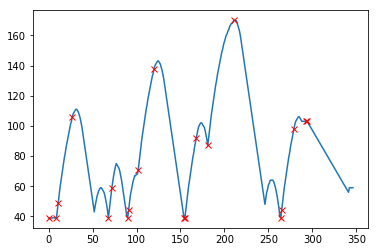

In [8]:
def button_change_times(button_masks):
    last_mask = 0
    mask_times = []
    for t, b in enumerate(button_masks):
        if b != last_mask:
            mask_times.append(t)
            last_mask = b
    return mask_times

button_times = button_change_times(track[:,3])

plt.plot(track[:,2])
plt.plot(np.array(button_times),track[np.array(button_times,dtype='int'),2],'rx')
plt.show()

In [9]:
# Templates is an array of model-generating functions of increasing complexity.
templates = [
    # Constant 0 velocity
    ("c0",lambda n,axis,vs,pv: pm.Normal(
        n, 
        mu=0,
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant velocity from old value
    ("cP",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pv,
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Fixed constant velocity
    ("cN",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_N",mu=0,sd=10),
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from 0
    ("acc0",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_acc",mu=0,sd=10)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from old velocity value
    ("accP",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pv+pm.Normal(n+"_acc",mu=0,sd=10)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from fixed constant velocity
    ("accN",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_N",mu=0,sd=10)+pm.Normal(n+"_acc",mu=0,sd=20)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
]
templates = templates
type2ind = {t[0]:i for i,t in enumerate(templates)}
print type2ind

{'accN': 5, 'cN': 2, 'acc0': 3, 'c0': 0, 'cP': 1, 'accP': 4}


In [10]:
iterations = 5000
def model_template_generate(template_i, axis, segment, prev_val):
    axisNames = [None,"x","y"]
    template = templates[template_i]
    (tn, t) = template
    with pm.Model() as model:
        lik = t(axisNames[axis],axis,segment,prev_val)
        step = pm.Metropolis()
        trace = pm.sample(iterations, step, progressbar=True)
        subtrace = trace[len(trace)/2:-1:10]
    return (tn,model,subtrace)

In [11]:
def model_set_generate(data):
    track,all_times,axis,i,j = data
    t0 = all_times[i]
    t1 = all_times[j]
    print "go",i,j,t0,t1
    if t0 == 0:
        segment = track[t0+1:t1+1]-track[t0:t1]
        prev_vel = float('inf')
    elif t1+1 > np.shape(track)[1]:
        extended_track = np.concatenate((track,[track[-1]]))
        segment = extended_track[t0+1:t1+1]-extended_track[t0:t1]
        prev_vel = track[t0,axis]-track[t0-1,axis]
    else:
        #9,10,11 - 8,9,10
        segment = track[t0+1:t1+1]-track[t0:t1]
        prev_vel = track[t0,axis]-track[t0-1,axis]
    segment[:,0] = range(0,np.shape(segment)[0])
    result = map(
        lambda ti: model_template_generate(ti, 
                                           axis,
                                           segment,
                                           prev_vel),
        range(0,len(templates)))
    return (i,j,t0,t1,result)

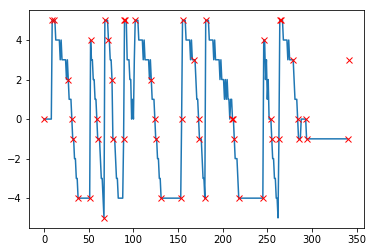

0
go 0 1 0 9


100%|██████████| 5000/5000 [00:01<00:00, 3990.50it/s]


-314.124617218
inf
-38.408245013
-36.2266883277
inf
-25.5733209865
go 0 2 0 11


100%|██████████| 5000/5000 [00:01<00:00, 4835.95it/s]


2.40515428112
inf
2.66254795212
2.46667392256
inf
2.8053692709
9
go 1 3 9 27


100%|██████████| 5000/5000 [00:01<00:00, 4758.43it/s]


2.8697303505
2.87201284079
1.68397231061
2.73710711235
2.72750017086
1.0582912504
go 1 4 9 31


100%|██████████| 5000/5000 [00:01<00:00, 4561.27it/s]


2.77270264878
2.76985868821
1.95287668854
2.70060208274
2.69807550284
1.09538500008
11
go 2 3 11 27


100%|██████████| 5000/5000 [00:01<00:00, 4693.72it/s]


2.8387598274
2.08978908031
1.64777644773
2.7082644754
0.993555670707
1.20244887632
go 2 4 11 31


100%|██████████| 5000/5000 [00:01<00:00, 4626.87it/s]


2.73007600213
2.34969499633
1.92103750218
2.66927830194
0.954096742894
1.18220936874
go 2 5 11 32


100%|██████████| 5000/5000 [00:01<00:00, 4519.04it/s]


2.6984069376
2.42529326115
2.02364590939
2.67642412575
1.0254032395
1.23148132236
27
go 3 5 27 32


100%|██████████| 5000/5000 [00:01<00:00, 4861.81it/s]


2.20183318557
2.64674378908
2.49959187745
2.91580740348
2.63180829885
2.84545504392
go 3 6 27 38


100%|██████████| 5000/5000 [00:01<00:00, 4781.41it/s]


2.24143066158
2.99028713211
2.53132585243
2.14200788998
1.64423006425
1.37664423515
go 3 7 27 51


100%|██████████| 5000/5000 [00:01<00:00, 4670.84it/s]


2.66833685738
3.25551927982
2.39098157082
1.68441126398
2.15214244887
1.82724566729
31
go 4 6 31 38


100%|██████████| 5000/5000 [00:01<00:00, 4775.76it/s]


2.47811048777
2.81069903209
2.49795726696
1.32347729603
2.14423871955
1.91625741444
go 4 7 31 51


100%|██████████| 5000/5000 [00:01<00:00, 4556.59it/s]


2.7589909157
2.99309840192
1.98450728158
1.83494712995
2.14727922676
1.67174746313
32
go 5 6 32 38


100%|██████████| 5000/5000 [00:01<00:00, 4802.62it/s]


2.60702365839
2.60589205513
2.46249724248
2.07465763226
2.1058875133
2.23039504809
go 5 7 32 51


100%|██████████| 5000/5000 [00:01<00:00, 4422.86it/s]


2.78905929423
2.7918359527
1.82248305863
1.97685890697
1.97734918775
1.59444354555
go 5 8 32 52


100%|██████████| 5000/5000 [00:01<00:00, 4285.77it/s]


2.7921662561
2.79115943466
1.80099452263
1.98382532695
1.98187636742
1.56006428368
go 5 9 32 59


100%|██████████| 5000/5000 [00:01<00:00, 4713.94it/s]


2.69879466162
2.6971943412
2.63292498732
2.79137081454
2.79655226121
2.65044423547
38
go 6 7 38 51


100%|██████████| 5000/5000 [00:01<00:00, 4681.54it/s]


2.95947833146
1.66963815849
-252.022831139
2.65397725481
1.38179181342
-20.2558800621
go 6 8 38 52


100%|██████████| 5000/5000 [00:01<00:00, 4630.08it/s]


2.94803395502
1.65471378295
-247.729470889
2.61813833035
1.32798033796
-75.1986008332
51
go 7 9 51 59


100%|██████████| 5000/5000 [00:01<00:00, 4709.30it/s]


2.71538528542
3.4271319204
3.05831153319
3.04089302811
3.41326487369
3.60661097336
go 7 10 51 60


100%|██████████| 5000/5000 [00:01<00:00, 4645.78it/s]


2.63223926531
3.36512106597
2.91146258886
2.94372097875
3.34133305526
3.41704774068
go 7 11 51 67


100%|██████████| 5000/5000 [00:01<00:00, 4692.58it/s]


2.49139969399
3.05678584997
2.72061963294
2.63882874133
3.13871250803
2.74915442571
go 7 12 51 68


100%|██████████| 5000/5000 [00:01<00:00, 4697.91it/s]


2.55434217895
3.02361795469
2.7619380195
2.62829063836
3.13421736829
2.68620659103
52
go 8 9 52 59


100%|██████████| 5000/5000 [00:01<00:00, 4791.32it/s]


2.67060202293
3.52022081636
2.46591508887
3.07088729499
3.72557153382
1.91907520025
go 8 10 52 60


100%|██████████| 5000/5000 [00:01<00:00, 4515.27it/s]


2.57576176432
3.44844955217
2.48863643849
2.95961344856
3.60642245504
1.65333377578
go 8 11 52 67


100%|██████████| 5000/5000 [00:01<00:00, 4671.23it/s]


2.45135067511
3.09717529373
2.70356258638
2.57280814913
3.22506554492
1.07232191515
go 8 12 52 68


100%|██████████| 5000/5000 [00:01<00:00, 4697.85it/s]


2.52984650726
3.06807538973
2.76297541617
2.55307462161
3.21278633468
1.08655758749
59
go 9 11 59 67


100%|██████████| 5000/5000 [00:01<00:00, 4670.90it/s]


2.53814392848
2.83957382599
2.50519003476
1.29428684884
1.89849765856
1.87104416619
go 9 12 59 68


100%|██████████| 5000/5000 [00:01<00:00, 4680.23it/s]


2.66801647459
2.93165853502
2.59865608817
1.29557708267
1.75022911489
1.79875502859
60
go 10 11 60 67


100%|██████████| 5000/5000 [00:01<00:00, 4415.41it/s]


2.65005070774
2.65436957831
2.5403659192
1.74997290723
1.77914505165
2.20790031488
go 10 12 60 68


100%|██████████| 5000/5000 [00:01<00:00, 4686.34it/s]


2.75663780812
2.75234633281
2.61021495434
1.57422748565
1.59510073606
2.00785238563
go 10 13 60 72


100%|██████████| 5000/5000 [00:01<00:00, 4662.07it/s]


2.91414942894
2.9065590964
3.22880256455
3.17019994384
3.17589857766
3.37665362292
67
go 11 13 67 72


100%|██████████| 5000/5000 [00:01<00:00, 4919.97it/s]


3.4053120257
3.84444247322
3.95747680991
3.74059704155
3.84572883934
4.64360936578
go 11 14 67 76


100%|██████████| 5000/5000 [00:01<00:00, 4640.80it/s]


3.1240265484
3.66884988061
3.20084965588
3.19495019741
3.49667666025
3.64395567293
go 11 15 67 77


100%|██████████| 5000/5000 [00:01<00:00, 4460.29it/s]


3.05910119653
3.62677712192
3.09723271581
3.13366619384
3.47244720879
3.53362204326
go 11 16 67 89


100%|██████████| 5000/5000 [00:01<00:00, 4690.85it/s]


2.82152063013
3.17428176497
2.98808434198
2.88822064072
3.27611145337
2.78554723147
go 11 17 67 90


100%|██████████| 5000/5000 [00:01<00:00, 4654.97it/s]


2.79588496198
3.15328389757
2.96171904673
2.85889712745
3.25359920169
2.80051317341
68
go 12 14 68 76


100%|██████████| 5000/5000 [00:01<00:00, 4855.52it/s]


3.12540111358
3.86074339157
2.15781503794
3.27617909669
3.85902012658
1.90723098378
go 12 15 68 77


100%|██████████| 5000/5000 [00:01<00:00, 4631.26it/s]


3.06506833329
3.80207691573
2.252714016
3.19351271292
3.78387386265
1.81928024059
go 12 16 68 89


100%|██████████| 5000/5000 [00:01<00:00, 4541.55it/s]


2.80308579301
3.33131010598
2.98656162979
2.85283698006
3.4170625654
1.93442499272
72
go 13 15 72 77


100%|██████████| 5000/5000 [00:01<00:00, 4705.18it/s]


3.03577487767
2.61702311703
2.64579365736
3.6055816405
2.31724990902
2.79447501583
go 13 16 72 89


100%|██████████| 5000/5000 [00:01<00:00, 4385.47it/s]


2.71077976726
3.43979501739
2.8717750532
2.52989836085
2.05478511486
2.11600031256
go 13 17 72 90


100%|██████████| 5000/5000 [00:01<00:00, 4722.18it/s]


2.68098339153
3.42906345586
2.82431517347
2.54285550818
2.37731770236
2.43581447181
76
go 14 16 76 89


100%|██████████| 5000/5000 [00:01<00:00, 4710.57it/s]


2.72603644164
3.31642838523
2.49257278292
1.77294480508
2.50279091309
2.13265482499
go 14 17 76 90


100%|██████████| 5000/5000 [00:01<00:00, 4808.66it/s]


2.67225027313
3.29255439457
2.45375907895
2.19167464953
2.68354576376
2.49676051355
77
go 15 16 77 89


100%|██████████| 5000/5000 [00:01<00:00, 4488.89it/s]


2.75802257977
3.19281252988
2.21070938006
1.77555825114
2.49526804046
1.74680999134
go 15 17 77 90


100%|██████████| 5000/5000 [00:01<00:00, 4564.60it/s]


2.70308551776
3.16315312661
2.21681300795
2.25211640791
2.67850155739
2.39163874934
89
go 16 19 89 102


100%|██████████| 5000/5000 [00:01<00:00, 4648.14it/s]


2.71400444697
3.44848164125
2.55234106846
2.83491766371
3.33748624002
2.8468152207
go 16 20 89 120


100%|██████████| 5000/5000 [00:01<00:00, 4628.91it/s]


2.74591121306
3.46423196844
2.07449800861
2.37915367986
2.95231884926
2.20813792765
go 16 21 89 124


100%|██████████| 5000/5000 [00:01<00:00, 4730.65it/s]


2.68644397761
3.43211207251
2.06697746736
2.427998306
2.97822893225
2.18603276303
go 16 22 89 125


100%|██████████| 5000/5000 [00:01<00:00, 4757.12it/s]


2.67171591658
3.4192907918
2.09511746702
2.4526057974
2.99189117892
2.19368844163
90
go 17 19 90 102


100%|██████████| 5000/5000 [00:01<00:00, 4602.87it/s]


2.74607073715
2.98515573218
2.49429447807
2.94165938208
3.10252924071
2.38884014047
go 17 20 90 120


100%|██████████| 5000/5000 [00:01<00:00, 4492.40it/s]


2.76295205001
2.98966104149
1.95851568548
2.42730647175
2.59049406959
2.10835937173
go 17 21 90 124


100%|██████████| 5000/5000 [00:01<00:00, 4719.73it/s]


2.70237855279
2.93779253058
1.99243463404
2.46565012483
2.62832001882
2.07872543715
91
go 18 19 91 102


100%|██████████| 5000/5000 [00:01<00:00, 4734.12it/s]


2.70454250383
2.71967374834
2.50586824716
2.92995179752
2.14096537528
2.53760978119
go 18 20 91 120


100%|██████████| 5000/5000 [00:01<00:00, 4742.75it/s]


2.74918219564
2.30422629402
1.95554130638
2.39124708063
2.14109304958
2.10972253496
go 18 21 91 124


100%|██████████| 5000/5000 [00:01<00:00, 4854.70it/s]


2.68620225304
2.39252364105
1.98468592958
2.43814973465
2.06832151311
2.08646732445
102
go 19 20 102 120


100%|██████████| 5000/5000 [00:01<00:00, 4822.60it/s]


2.87149717996
1.72037166114
1.67912591492
2.73092597356
1.90515860855
1.05652399042
go 19 21 102 124


100%|██████████| 5000/5000 [00:01<00:00, 4704.78it/s]


2.769587787
1.8026154403
1.95913827862
2.69525755729
1.92677750015
1.08544798584
120
go 20 22 120 125


100%|██████████| 5000/5000 [00:00<00:00, 5134.18it/s]


2.21164033709
2.6751640262
2.46362933312
2.909517836
2.64333438708
2.90457788916
go 20 23 120 131


100%|██████████| 5000/5000 [00:01<00:00, 4784.67it/s]


2.24016220575
2.98907980304
2.51534659556
2.14496045187
1.653439583
1.38177881716
go 20 24 120 153


100%|██████████| 5000/5000 [00:01<00:00, 4731.50it/s]


2.71623652555
3.2911570127
2.2349980172
1.76194981047
2.33913933115
1.87786334408
124
go 21 23 124 131


100%|██████████| 5000/5000 [00:01<00:00, 4811.73it/s]


2.48038735622
2.81193058081
2.47287829608
1.32990175283
2.17467353789
1.9056010783
go 21 24 124 153


100%|██████████| 5000/5000 [00:01<00:00, 4799.41it/s]


2.77890674195
3.00809740408
1.75950845709
1.9445203295
2.21694928451
1.57113194454
125
go 22 23 125 131


100%|██████████| 5000/5000 [00:00<00:00, 5160.72it/s]


2.59549107602
2.59486810358
2.46390025235
2.11078115074
2.10279667659
2.21842562468
go 22 24 125 153


100%|██████████| 5000/5000 [00:01<00:00, 4685.45it/s]


2.7981590878
2.79678780456
1.57568280506
2.03461291509
2.03300571632
1.4191094654
go 22 25 125 154


100%|██████████| 5000/5000 [00:01<00:00, 4630.79it/s]


2.79827409855
2.79732242305
1.54989957062
2.04378954481
2.041512694
1.40745450766
go 22 26 125 155


100%|██████████| 5000/5000 [00:01<00:00, 4734.78it/s]


2.7775338578
2.77841438396
1.73735994203
2.2183603682
2.21231496121
1.82220150365
131
go 23 24 131 153


100%|██████████| 5000/5000 [00:01<00:00, 4804.27it/s]


2.89564382081
1.56708653475
-273.903409915
2.43558816888
1.10781207843
-26.2348154088
go 23 25 131 154


100%|██████████| 5000/5000 [00:01<00:00, 4828.49it/s]


2.89505718507
1.55896714759
-243.967587244
2.41982551262
1.09523378094
-28.3083093415
153
go 24 27 153 168


100%|██████████| 5000/5000 [00:01<00:00, 4837.02it/s]


2.93722000337
3.56190210225
2.67283772863
2.70954205887
3.1512887053
2.91379268441
go 24 28 153 173


100%|██████████| 5000/5000 [00:01<00:00, 4857.96it/s]


2.81246128039
3.48932900314
2.4808576385
2.68428507524
3.1418873983
2.70716083348
go 24 29 153 174


100%|██████████| 5000/5000 [00:01<00:00, 4791.97it/s]


2.7882865905
3.46438362772
2.48379497274
2.7098417982
3.15829356966
2.69402541236
154
go 25 27 154 168


100%|██████████| 5000/5000 [00:01<00:00, 4681.96it/s]


2.95251965888
3.60949496196
2.15576913289
2.7581713582
3.30338673491
2.47560074914
go 25 28 154 173


100%|██████████| 5000/5000 [00:01<00:00, 4751.58it/s]


2.80945733593
3.51814429251
2.119681296
2.70686837091
3.23997270803
2.22032776626
go 25 29 154 174


100%|██████████| 5000/5000 [00:01<00:00, 4757.12it/s]


2.78138369659
3.49274125786
2.18921029304
2.72983002853
3.25132027315
2.21370369462
155
go 26 27 155 168


100%|██████████| 5000/5000 [00:01<00:00, 4868.17it/s]


2.99048957348
2.98949997446
1.67176747702
2.88787208112
2.90033321955
1.24750061113
go 26 28 155 173


100%|██████████| 5000/5000 [00:01<00:00, 4799.51it/s]


2.84334241124
2.84202934117
2.00228823682
2.7909243888
2.79478229185
1.29647946783
168
go 27 28 168 173


100%|██████████| 5000/5000 [00:01<00:00, 4989.59it/s]


2.70240522564
2.30274247088
2.74488349251
3.34850723389
1.92139668297
2.87422535385
go 27 29 168 174


100%|██████████| 5000/5000 [00:00<00:00, 5130.69it/s]


2.54480366689
2.42155764925
2.70145906204
3.10991299199
1.60743199459
2.35075824491
go 27 30 168 180


100%|██████████| 5000/5000 [00:01<00:00, 4670.83it/s]


2.33447174523
2.89358984876
2.64757157748
2.47468269043
1.00318425966
1.37194613326
go 27 31 168 181


100%|██████████| 5000/5000 [00:01<00:00, 4756.04it/s]


2.4203935898
2.9716970268
2.69550456214
2.43061713673
0.926209733547
1.25986136592
go 27 32 168 211


100%|██████████| 5000/5000 [00:01<00:00, 4820.25it/s]


2.52679631462
2.39756886203
2.36159273697
2.39845916563
2.42270163098
2.45616841188
173
go 28 30 173 180


100%|██████████| 5000/5000 [00:01<00:00, 4855.63it/s]


2.42965359928
2.76028622851
2.4846855529
1.45720470218
2.09570683939
2.13989023105
go 28 31 173 181


100%|██████████| 5000/5000 [00:01<00:00, 4839.98it/s]


2.54161318647
2.83496425117
2.51961538062
1.32155092632
1.91849499485
1.88337551477
go 28 32 173 211


100%|██████████| 5000/5000 [00:01<00:00, 4771.73it/s]


2.55874121427
2.38753443378
2.43477130884
2.44242951045
2.41383601218
2.53017713603
174
go 29 30 174 180


100%|██████████| 5000/5000 [00:00<00:00, 5089.77it/s]


2.56524700724
2.56337425089
2.55633312429
2.01402418024
2.04712399548
2.54018426627
go 29 31 174 181


100%|██████████| 5000/5000 [00:01<00:00, 4817.29it/s]


2.65643273262
2.64275818873
2.54526265541
1.76143307559
1.77469436487
2.21758785725
go 29 32 174 211


100%|██████████| 5000/5000 [00:01<00:00, 4725.59it/s]


2.57341923746
2.57443494917
2.44594888723
2.46036595659
2.46119204998
2.5504541658
180
go 30 32 180 211


100%|██████████| 5000/5000 [00:01<00:00, 4682.63it/s]


2.63237580562
3.2456553299
2.23386050936
2.57862710679
2.97822594649
2.24474085182
go 30 33 180 212


100%|██████████| 5000/5000 [00:01<00:00, 4797.94it/s]


2.6132111397
3.22771850246
2.2405467494
2.57445634886
2.9782633022
2.21693192181
go 30 34 180 213


100%|██████████| 5000/5000 [00:01<00:00, 4708.62it/s]


2.59941273196
3.21844762239
2.24300417133
2.56743862893
2.97368489451
2.19873842407
go 30 35 180 218


100%|██████████| 5000/5000 [00:01<00:00, 4792.88it/s]


2.55309902179
3.14069608423
2.41594478288
2.62345425509
3.003968817
2.17753744264
go 30 36 180 245


100%|██████████| 5000/5000 [00:01<00:00, 4828.28it/s]


2.68104400682
2.86800464765
2.72433494287
2.52048443907
2.91624051425
1.99128456183
go 30 37 180 246


100%|██████████| 5000/5000 [00:01<00:00, 4776.02it/s]


2.6824289214
2.86058664354
2.72145055498
2.50996204777
2.91024394301
1.99104155003
go 30 38 180 254


100%|██████████| 5000/5000 [00:01<00:00, 4630.20it/s]


2.6524242475
2.889924317
2.69803753825
2.62099559627
2.89225561507
2.54481753201
181
go 31 32 181 211


100%|██████████| 5000/5000 [00:01<00:00, 4753.67it/s]


2.62540187705
3.4056145264
1.98308165082
2.58341842704
3.14295474548
0.912230043907
go 31 33 181 212


100%|██████████| 5000/5000 [00:01<00:00, 4811.87it/s]


2.60620018105
3.39813549979
2.02423913777
2.5741862169
3.14327319969
0.891618364936
go 31 34 181 213


100%|██████████| 5000/5000 [00:01<00:00, 4660.54it/s]


2.58882787361
3.38467251465
2.04527904835
2.56777402349
3.1378233439
0.865874601763
go 31 35 181 218


100%|██████████| 5000/5000 [00:01<00:00, 4746.99it/s]


2.54361525703
3.31313991675
2.34351321898
2.62094692994
3.14476238157
1.2361338189
211
go 32 35 211 218


100%|██████████| 5000/5000 [00:01<00:00, 4857.53it/s]


2.37991054201
2.71677566572
2.47552328718
1.47473671002
2.00090654848
2.09867727534
go 32 36 211 245


100%|██████████| 5000/5000 [00:01<00:00, 4839.75it/s]


2.77664035653
3.00351473404
1.75310242539
1.95101367635
2.21299335448
1.59225576626
212
go 33 35 212 218


100%|██████████| 5000/5000 [00:00<00:00, 5238.31it/s]


2.50716126906
2.50333474196
2.59007439468
1.83666076451
1.85044831468
2.51986367404
go 33 36 212 245


100%|██████████| 5000/5000 [00:01<00:00, 4970.70it/s]


2.79252093149
2.78918661827
1.61971578417
2.02047466838
2.01992764282
1.50528538879
go 33 37 212 246


100%|██████████| 5000/5000 [00:01<00:00, 4894.19it/s]


2.79278215613
2.79392631313
1.60214801078
2.02594609262
2.0227163002
1.4853528543
go 33 38 212 254


100%|██████████| 5000/5000 [00:01<00:00, 4823.08it/s]


2.72875914411
2.72759689953
2.46462964899
2.69537849677
2.69385750783
2.47221807578
213
go 34 35 213 218


100%|██████████| 5000/5000 [00:00<00:00, 5076.17it/s]


2.67678422221
2.66837732656
2.50039528379
2.62928950543
2.64670677623
2.90347942301
go 34 36 213 245


100%|██████████| 5000/5000 [00:01<00:00, 4642.75it/s]


2.80964810148
2.81149663298
1.38638392866
2.09530886122
2.09699142704
1.29643471725
go 34 37 213 246


100%|██████████| 5000/5000 [00:01<00:00, 4746.55it/s]


2.81147334269
2.80918706769
1.36177893394
2.09149775072
2.09730172968
1.2799279106
go 34 38 213 254


100%|██████████| 5000/5000 [00:01<00:00, 4714.80it/s]


2.74182600355
2.74077410063
2.46569397385
2.72082998583
2.71819376917
2.44175162453
218
go 35 36 218 245


100%|██████████| 5000/5000 [00:01<00:00, 4788.83it/s]


2.88398576472
1.53810003759
-272.774678217
2.37342797286
1.03636251384
-24.225456587
go 35 37 218 246


100%|██████████| 5000/5000 [00:01<00:00, 4834.30it/s]


2.87735612931
1.53479325921
-196.010018863
2.36626786039
1.02490280965
-26.7429421228
245
go 36 38 245 254


100%|██████████| 5000/5000 [00:01<00:00, 4704.94it/s]


2.66762281708
3.38874555635
2.95526148789
3.02354182569
3.40633355648
3.50986863752
go 36 39 245 255


100%|██████████| 5000/5000 [00:01<00:00, 4812.14it/s]


2.59929776935
3.33762054926
2.85381234074
2.92691858355
3.3125421591
3.34614948083
go 36 40 245 263


100%|██████████| 5000/5000 [00:01<00:00, 4906.61it/s]


2.60665682775
3.00495492572
2.7798096271
2.61497206373
3.12268834111
2.64826782733
246
go 37 38 246 254


100%|██████████| 5000/5000 [00:01<00:00, 4871.39it/s]


2.62405991244
3.46516781141
2.67825206102
3.04494648792
3.63259899899
2.48587400128
go 37 39 246 255


100%|██████████| 5000/5000 [00:01<00:00, 4921.22it/s]


2.56017912992
3.41163388412
2.59549171843
2.92224511403
3.524794316
2.28755002624
go 37 40 246 263


100%|██████████| 5000/5000 [00:01<00:00, 4762.22it/s]


2.58613124268
3.03125401151
2.78975360883
2.54806533543
3.19057506427
1.42145089154
go 37 41 246 264


100%|██████████| 5000/5000 [00:01<00:00, 4780.77it/s]


2.56111775347
3.01052783891
2.75008620928
2.52801070253
3.14426308553
2.09845978298
254
go 38 40 254 263


100%|██████████| 5000/5000 [00:01<00:00, 4802.72it/s]


2.7785543317
2.79961192289
2.580559518
1.28442622197
1.3030024514
1.62797876197
go 38 41 254 264


100%|██████████| 5000/5000 [00:01<00:00, 4916.39it/s]


2.70552839362
2.70472271538
2.50572037601
2.36339219243
2.37730603767
2.73654764574
255
go 39 40 255 263


100%|██████████| 5000/5000 [00:01<00:00, 4790.78it/s]


2.87396669744
2.87388209249
2.47762513808
1.97363329528
1.97794607807
1.67008287217
go 39 41 255 264


100%|██████████| 5000/5000 [00:01<00:00, 4847.01it/s]


2.7913454818
2.78563254819
2.45311495292
2.59128114414
2.57688033569
2.85861934553
263
go 40 43 263 279


100%|██████████| 5000/5000 [00:01<00:00, 4809.87it/s]


2.90130328243
3.68961852042
2.1824580992
2.69497862093
3.34881103097
2.46055362711
go 40 44 263 284


100%|██████████| 5000/5000 [00:01<00:00, 4816.75it/s]


2.77661738273
3.61287548568
2.16626293797
2.68256439957
3.30693034546
2.25886520183
go 40 45 263 285


100%|██████████| 5000/5000 [00:01<00:00, 4470.41it/s]


2.74767485377
3.59606116222
2.21958682336
2.68599116133
3.30776908176
2.25033895718
264
go 41 43 264 279


100%|██████████| 5000/5000 [00:01<00:00, 4823.26it/s]


2.94048120035
3.15094079036
1.65354681245
2.81987041759
2.98679506265
1.08640596008
go 41 44 264 284


100%|██████████| 5000/5000 [00:01<00:00, 4851.29it/s]


2.79897884809
3.02762003105
2.00272573894
2.75305161476
2.91355809135
1.20132062797
265
go 42 43 265 279


100%|██████████| 5000/5000 [00:01<00:00, 4635.86it/s]


2.93418707469
1.94843374402
1.64946758289
2.82622138679
0.843614847308
1.16920037193
go 42 44 265 284


100%|██████████| 5000/5000 [00:01<00:00, 4713.64it/s]


2.77944187158
2.31148072117
2.0079034927
2.73977152281
1.01958021082
1.2402380602
279
go 43 44 279 284


100%|██████████| 5000/5000 [00:00<00:00, 5103.96it/s]


2.54653478941
2.44974875088
2.66938350577
3.19087046492
2.20232026148
3.11381709502
go 43 45 279 285


100%|██████████| 5000/5000 [00:00<00:00, 5037.50it/s]


2.37686263014
2.48839969945
2.5633980471
2.95727230036
1.86772683989
2.60083629431
go 43 46 279 293


100%|██████████| 5000/5000 [00:01<00:00, 4751.88it/s]


1.79565395189
2.63561928737
2.02049442001
2.0707563109
2.02496750383
2.047128501
go 43 47 279 294


100%|██████████| 5000/5000 [00:01<00:00, 4700.26it/s]


1.75200457626
2.62934413929
1.96143054143
1.99974792887
2.01758972556
2.00620153973
go 43 48 279 340


100%|██████████| 5000/5000 [00:01<00:00, 4808.83it/s]


1.50323775199
2.77523531501
1.29304195575
1.07887809501
1.9861913062
1.14503234629
go 43 49 279 341


100%|██████████| 5000/5000 [00:01<00:00, 4766.57it/s]


1.50212980358
2.77469583149
1.28510169082
1.07336285867
1.98747354826
1.13832501125
284
go 44 46 284 293


100%|██████████| 5000/5000 [00:01<00:00, 4826.71it/s]


1.29683772808
2.09216440093
1.52833154442
1.69308615582
2.24692818301
1.89818801185
go 44 47 284 294


100%|██████████| 5000/5000 [00:01<00:00, 4825.07it/s]


1.19952993655
2.0370993012
1.42428572127
1.56405329761
2.1223285013
1.70819054869
go 44 48 284 340


100%|██████████| 5000/5000 [00:01<00:00, 4820.26it/s]


1.41095083339
2.11225929344
0.456420619375
0.670241250525
1.38684971971
0.384997992467
go 44 49 284 341


100%|██████████| 5000/5000 [00:01<00:00, 4705.46it/s]


1.41179611657
2.11046768898
0.446768945253
0.671165707698
1.38831537493
0.37736152051
285
go 45 46 285 293


100%|██████████| 5000/5000 [00:01<00:00, 4668.57it/s]


1.38441356599
1.4007726299
1.6610947489
1.86093367651
1.87407774019
1.71001462927
go 45 47 285 294


100%|██████████| 5000/5000 [00:01<00:00, 4724.77it/s]


1.28708385179
1.28909043058
1.52612905201
1.71925028164
1.7341530067
1.55424806628
go 45 48 285 340


100%|██████████| 5000/5000 [00:01<00:00, 4778.96it/s]


1.42248910244
1.42245780048
0.401174768074
0.703748069327
0.705438438315
0.357180734066
go 45 49 285 341


100%|██████████| 5000/5000 [00:01<00:00, 4750.68it/s]


1.42094058553
1.42253224229
0.39420051095
0.705839079204
0.704399412724
0.346092126967
293
go 46 48 293 340


100%|██████████| 5000/5000 [00:01<00:00, 4697.74it/s]


1.47738040027
1.47795806472
-0.326550160317
0.865129340418
0.861268028814
-0.263528075298
go 46 49 293 341


100%|██████████| 5000/5000 [00:01<00:00, 4755.57it/s]


1.47531163165
1.47820796322
-0.340297904268
0.860926756711
0.858863690733
-0.281307054999
294
go 47 48 294 340


100%|██████████| 5000/5000 [00:01<00:00, 4710.09it/s]


1.48895882157
1.49136561558
-197.819923571
0.911961550632
0.909908319992
-27.2093693777
go 47 49 294 341


100%|██████████| 5000/5000 [00:01<00:00, 4849.42it/s]


1.48802475311
1.48904672251
-204.268585893
0.905309484767
0.906980549081
-30.3228494381
340
341
Done!
CPU times: user 20min 38s, sys: 32.8 s, total: 21min 11s
Wall time: 20min 35s


In [12]:
%%time
iterations = 5000
all_times = sorted(set(velocity_times + button_times))

all_times = all_times[:50]#[:len(all_times)/4]
likes = [None]*len(all_times)

plt.plot(velocities[:all_times[-1]])
plt.plot(np.array(all_times),velocities[np.array(all_times,dtype='int')],'rx')
plt.show()

# Takahashi Meijin constant, 60 frames / 16 inputs ~= 4 frames per input.
# But note that in general transitions may happen more frequently due to collisions, etc.
min_interval = 4 

for i in range(0,len(all_times)):
    likes[i] = [None]*len(all_times)
    t0 = all_times[i]
    print t0
    min_likelihood = float('inf')
    for j in [j for j in range(i+1, len(all_times)) if all_times[j]-all_times[i] > min_interval]:
        js = model_set_generate((track,all_times,axis,i,j))
        the_templates = js[-1]
        foundOne = False
        for tn,mod,trace in the_templates:
            logp = -np.mean([mod.logp(pt) for pt in trace])/float(all_times[j]-all_times[i])
            print logp
            if logp < min_likelihood:
                min_likelihood = logp
                foundOne = True
        if not foundOne:
            break
        likes[i][j] = js
        
    #js = map(model_set_generate,
    #         map(lambda j:(track,all_times,axis,i,j), [j for j in range(i+1, len(all_times)) if all_times[j]-all_times[i] > min_interval]))
    #likes[i][i+1:len(all_times)] = js

print "Done!"

In [21]:
for li in likes[0:10]:
    for lij in li[0:10]:
        if lij is None or lij == []: 
            continue
        (i,j,t0,t1,models) = lij
        print i,j,t0,t1
        for m in models:
            print m[0],pm.df_summary(m[-1])
        print "\n"

0 1 0 9
c0                 mean             sd       mc_error        hpd_2.5  \
y_err  8.503393e-155  1.168727e-155  9.099216e-157  7.463410e-155   

            hpd_97.5  
y_err  1.069682e-154  
cP        mean            sd  mc_error  hpd_2.5  hpd_97.5
y_err  10.0  1.776357e-15       0.0     10.0      10.0
cN                mean            sd      mc_error       hpd_2.5      hpd_97.5
y_N   -3.718825e-16  2.101447e-15  2.134803e-16 -4.026456e-16  5.120295e-16
y_err  5.515829e-16  2.272549e-15  2.330409e-16  5.371152e-27  4.141219e-15
acc0                mean            sd      mc_error       hpd_2.5      hpd_97.5
y_acc  1.599717e-15  6.111614e-15  6.748669e-16 -2.832508e-17  2.174740e-14
y_err  1.026880e-14  3.078341e-14  3.351859e-15  3.535488e-26  9.988233e-14
accP        mean            sd  mc_error  hpd_2.5  hpd_97.5
y_acc   0.0  0.000000e+00       0.0      0.0       0.0
y_err  10.0  1.776357e-15       0.0     10.0      10.0
accN                mean            sd      mc_error     

In [66]:
# What is the mode as of just before each switch-point, 
# and what is the accumulated cost of the approximation up to that point?
modes = [(0,None)]*(len(all_times))

#modes is offset from likes by 1

ks = {"c0":1, "cP":1, "cN":2, "acc0":2, "accP":2, "accN":3}

cost = 1

# Takahashi Meijin constant, 60 frames / 16 inputs ~= 4 frames per input.
# But note that in general transitions may happen more frequently due to collisions, etc.
min_interval = 4 

for j in range(1, len(all_times)):
    least = float("inf")
    least_template = None
    print "j",j
    for i in range(0, j):
        data = likes[i][j]
        if not data:
            continue
        dt = data[3]-data[2]
        if dt < min_interval:
            print data[:4]
            continue
        the_templates = data[-1]
        print "i",i
        for tn,mod,trace in the_templates:
            k = ks[tn]
            summary = pm.df_summary(trace)
            logp = np.mean([mod.logp(pt) for pt in trace])
            # WAIC
            #crit = -pm.stats.waic(model=mod,trace=trace)
            # DIC
            #crit = pm.stats.dic(model=mod,trace=trace)
            #if np.abs(crit) > 1e5:
            #    crit = float('inf')
            # BPIC
            #crit = pm.stats.bpic(model=mod,trace=trace)
            # AICc
            #crit = 2*k - 2 * logp + (2*(k+1)*(k+2))/(dt-k-2)
            # BIC
            #crit = math.log(dt)*k - 2 * logp
            # max-likelihood
            crit = -logp
            
            #crit = math.log(dt) - logp
            m_prev = modes[i][0]
            # ??
            #error = summary["mean"]["y_err"]*dt
            here = crit + m_prev + cost
            print i,j,data[2],data[3],tn,logp,summary["mean"]["y_err"],crit,here,least
            if here < least:
                print "update least",here
                least = here
                # prev_i,this_j,t0,t1,name,summary,criterion
                least_template = (i,j,data[2],data[3],tn,summary,crit)
    modes[j] = (least, least_template)

map(lambda m:m[1],modes)

j 1
i 0
0 1 0 9 c0 2827.12155496 8.50339305799e-155 -2827.12155496 -2826.12155496 inf
update least -2826.12155496
0 1 0 9 cP -inf 10.0000003198 inf inf -2826.12155496
0 1 0 9 cN 345.674205117 5.51582851051e-16 -345.674205117 -344.674205117 -2826.12155496
0 1 0 9 acc0 326.040194949 1.0268799632e-14 -326.040194949 -325.040194949 -2826.12155496
0 1 0 9 accP -inf 10.0000003198 inf inf -2826.12155496
0 1 0 9 accN 230.159888879 1.51689048564e-11 -230.159888879 -229.159888879 -2826.12155496
j 2
j 3
i 1
1 3 9 27 c0 -51.6551463089 4.03652912881 51.6551463089 -2773.46640865 inf
update least -2773.46640865
1 3 9 27 cP -51.6962311343 4.14272879126 51.6962311343 -2773.42532383 -2773.46640865
1 3 9 27 cN -30.3115015909 0.982414053224 30.3115015909 -2794.81005337 -2773.46640865
update least -2794.81005337
1 3 9 27 acc0 -49.2679280222 3.01742232822 49.2679280222 -2775.85362694 -2794.81005337
1 3 9 27 accP -49.0950030754 2.85965451789 49.0950030754 -2776.02655189 -2794.81005337
1 3 9 27 accN -19.049242

[None,
 (0,
  1,
  0,
  9,
  'c0',
                  mean             sd       mc_error        hpd_2.5  \
  y_err  8.503393e-155  1.168727e-155  9.099216e-157  7.463410e-155   
  
              hpd_97.5  
  y_err  1.069682e-154  ,
  -2827.1215549624553),
 None,
 (1, 3, 9, 27, 'accN',            mean        sd  mc_error   hpd_2.5  hpd_97.5
  y_N    5.035609  0.174498  0.014917  4.685885  5.353041
  y_acc -0.154032  0.018239  0.001506 -0.189064 -0.120541
  y_err  0.389875  0.070583  0.004421  0.273514  0.525919, 19.049242507145845),
 None,
 (3, 5, 27, 32, 'c0',           mean        sd  mc_error   hpd_2.5  hpd_97.5
  y_err  1.62048  0.712288  0.049974  0.638696  3.199801, 11.009165927857239),
 (3, 6, 27, 38, 'accN',            mean        sd  mc_error   hpd_2.5  hpd_97.5
  y_N    1.983808  0.188787  0.016695  1.640349  2.326436
  y_acc -0.523671  0.032379  0.002869 -0.589277 -0.463372
  y_err  0.375129  0.106331  0.008060  0.199678  0.544202, 15.143086586630613),
 (6,
  7,
  38,
  51,
  

In [67]:
def get_path(modes):
    mj = len(modes)-1
    path = [modes[mj]]
    while mj > 0:
        mj = modes[mj][1][0]
        path.append(modes[mj])
    return list(reversed(path))[1:]

path = get_path(modes)
for ii,p in enumerate(path):
    print ii,p[0],'\n',p[1],'\n'

0 -2826.12155496 
(0, 1, 0, 9, 'c0',                 mean             sd       mc_error        hpd_2.5  \
y_err  8.503393e-155  1.168727e-155  9.099216e-157  7.463410e-155   

            hpd_97.5  
y_err  1.069682e-154  , -2827.1215549624553) 

1 -2806.07231246 
(1, 3, 9, 27, 'accN',            mean        sd  mc_error   hpd_2.5  hpd_97.5
y_N    5.035609  0.174498  0.014917  4.685885  5.353041
y_acc -0.154032  0.018239  0.001506 -0.189064 -0.120541
y_err  0.389875  0.070583  0.004421  0.273514  0.525919, 19.049242507145845) 

2 -2789.92922587 
(3, 6, 27, 38, 'accN',            mean        sd  mc_error   hpd_2.5  hpd_97.5
y_N    1.983808  0.188787  0.016695  1.640349  2.326436
y_acc -0.523671  0.032379  0.002869 -0.589277 -0.463372
y_err  0.375129  0.106331  0.008060  0.199678  0.544202, 15.143086586630613) 

3 -6065.22603068 
(6, 7, 38, 51, 'cN',                mean            sd      mc_error        hpd_2.5      hpd_97.5
y_N   -4.000000e+00  1.296254e-15  1.438328e-16  -4.000000e+00 

In [68]:
"""UnionFind.py

Union-find data structure. Based on Josiah Carlson's code,
http://aspn.activestate.com/ASPN/Cookbook/Python/Recipe/215912
with significant additional changes by D. Eppstein.
"""

class UnionFind:
    """Union-find data structure.

    Each unionFind instance X maintains a family of disjoint sets of
    hashable objects, supporting the following two methods:

    - X[item] returns a name for the set containing the given item.
      Each set is named by an arbitrarily-chosen one of its members; as
      long as the set remains unchanged it will keep the same name. If
      the item is not yet part of a set in X, a new singleton set is
      created for it.

    - X.union(item1, item2, ...) merges the sets containing each item
      into a single larger set.  If any item is not yet part of a set
      in X, it is added to X as one of the members of the merged set.
    """

    def __init__(self):
        """Create a new empty union-find structure."""
        self.weights = {}
        self.parents = {}

    def __getitem__(self, object):
        """Find and return the name of the set containing the object."""

        # check for previously unknown object
        if object not in self.parents:
            self.parents[object] = object
            self.weights[object] = 1
            return object

        # find path of objects leading to the root
        path = [object]
        root = self.parents[object]
        while root != path[-1]:
            path.append(root)
            root = self.parents[root]

        # compress the path and return
        for ancestor in path:
            self.parents[ancestor] = root
        return root
        
    def __iter__(self):
        """Iterate through all items ever found or unioned by this structure."""
        return iter(self.parents)

    def union(self, *objects):
        """Find the sets containing the objects and merge them all."""
        roots = [self[x] for x in objects]
        heaviest = max([(self.weights[r],r) for r in roots])[1]
        for r in roots:
            if r != heaviest:
                self.weights[heaviest] += self.weights[r]
                self.parents[r] = heaviest


In [69]:
cross = {}
unions = UnionFind()

for ii,mode in enumerate(path):
    d = {t[0]:t[1:] for t in likes[mode[1][0]][mode[1][1]][4]}
    model,trace = {t[0]:t[1:] for t in likes[mode[1][0]][mode[1][1]][4]}[mode[1][4]]
    for jj,mode2 in enumerate(path):
        model2,trace2 = {t[0]:t[1:] for t in likes[mode2[1][0]][mode2[1][1]][4]}[mode2[1][4]]
        if mode2[1][4] == mode[1][4]:
            try:
                crit = -np.mean([model.logp(pt) for pt in trace2])#pm.stats.dic(model=model,trace=trace2)
            except:

                crit = float('inf')
        else:
            crit = float('inf')
        cross[(ii,jj)] = crit

In [70]:
complexityWeight = 20
for d in sorted(cross):
    good = True
    for t in [cross[d], cross[(d[0],d[0])], cross[(d[1],d[1])], cross[(d[1],d[0])]]:
        if t == float('inf'):
            good = False
    if not good:
        continue
    joined = min(cross[d] + cross[(d[0],d[0])],cross[(d[1],d[1])]+cross[(d[1],d[0])])
   
    if (joined < (cross[(d[0],d[0])]+cross[(d[1],d[1])]) +complexityWeight):
        unions.union(d[0],d[1])
merged = {}
for u in unions:
    print u, unions[u]
    if unions[u] not in merged:
        merged[unions[u]] = set()
    merged[unions[u]].add(u)
print merged

0 0
1 6
2 10
3 11
4 17
5 15
6 6
7 7
8 12
9 6
10 10
11 11
12 12
13 13
14 6
15 15
16 11
17 17
18 15
19 12
20 17
21 21
{0: set([0]), 6: set([1, 14, 6, 9]), 7: set([7]), 10: set([2, 10]), 11: set([11, 16, 3]), 12: set([8, 19, 12]), 13: set([13]), 15: set([18, 5, 15]), 17: set([17, 4, 20]), 21: set([21])}


In [71]:
iterations = 50000

def model_sets_generate(ti,data):
    track,all_times,axis,i,j = data
    segments = []
    for ind in range(len(i)):
        t0 = all_times[i[ind]]
        t1 = all_times[j[ind]]
        if t0 == 0:
            segment = track[t0+1:t1+1]-track[t0:t1]
            prev_vel = 0
        elif t1+1 > np.shape(track)[1]:
            extended_track = np.concatenate((track,[track[-1]]))
            segment = extended_track[t0+1:t1+1]-extended_track[t0:t1]
            prev_vel = track[t0,axis]-track[t0-1,axis]
        else:
            #9,10,11 - 8,9,10
            segment = track[t0+1:t1+1]-track[t0:t1]
            prev_vel = track[t0,axis]-track[t0-1,axis]
        segment[:,0] = range(0,np.shape(segment)[0])
        segments.append(segment)
    segment = np.vstack(segments)
    result = model_template_generate(ti, 
                                       axis,
                                       segment,
                                       prev_vel)
    return (i,j,t0,t1,result)

for m in merged:
    print ''
    if len(merged[m]) > 1:
        i_ = []
        j_ = []
        for t in merged[m]:
            mode = path[t]
            dat = likes[mode[1][0]][mode[1][1]]            
            ti = type2ind[mode[1][4]]
            i_.append(dat[0])
            j_.append(dat[1])
            
        result = model_sets_generate(ti,(track,all_times,axis,i_,j_))
        print pm.df_summary(result[4][2])

100%|██████████| 50000/50000 [00:11<00:00, 4431.55it/s]


           mean        sd  mc_error   hpd_2.5  hpd_97.5
y_N    4.964086  0.087689  0.002590  4.795200  5.131502
y_acc -0.153704  0.006883  0.000207 -0.166742 -0.140193
y_err  0.455383  0.040004  0.000789  0.379411  0.535194




100%|██████████| 50000/50000 [00:10<00:00, 4580.51it/s]


           mean        sd  mc_error   hpd_2.5  hpd_97.5
y_N    1.958944  0.140657  0.004027  1.689764  2.232848
y_acc -0.518566  0.023682  0.000716 -0.565304 -0.470437
y_err  0.340403  0.059862  0.001276  0.240539  0.456833



100%|██████████| 50000/50000 [00:07<00:00, 6540.97it/s]


                mean             sd       mc_error        hpd_2.5  \
y_N    -4.000000e+00   0.000000e+00   0.000000e+00  -4.000000e+00   
y_err  7.584915e-155  1.348565e-156  3.329252e-158  7.458445e-155   

            hpd_97.5  
y_N    -4.000000e+00  
y_err  7.842421e-155  



100%|██████████| 50000/50000 [00:07<00:00, 6677.20it/s]


           mean        sd  mc_error   hpd_2.5  hpd_97.5
y_N    2.975474  0.287747  0.005803  2.421059  3.505755
y_err  2.005665  0.214889  0.004035  1.625416  2.451020




100%|██████████| 50000/50000 [00:07<00:00, 6826.16it/s]


           mean        sd  mc_error   hpd_2.5  hpd_97.5
y_acc -0.618281  0.026159  0.000582 -0.663745 -0.564964
y_err  0.523693  0.084520  0.001835  0.377777  0.691335



100%|██████████| 50000/50000 [00:03<00:00, 13156.23it/s]

           mean        sd  mc_error  hpd_2.5  hpd_97.5
y_err  2.243025  0.312515  0.006652   1.6437  2.851833



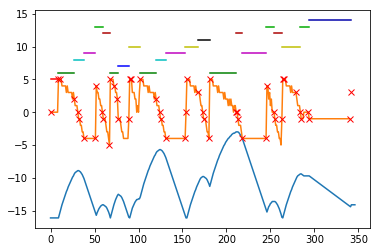

In [72]:
colors = ['r','g','b','c','m','y','k',"#aa0000","#00aa00","#0000aa","#880000","#008800","#000088"]
merged2color = {m:i for i,m in enumerate(sorted(merged))}

for m in merged:
    for t in merged[m]:
        plt.plot(np.array(path[t][1][2:4]),np.array([merged2color[m], merged2color[m]])+5,colors[merged2color[m]])

plt.plot(track[:,2]*0.1-20)
plt.plot(velocities[:all_times[-1]])
plt.plot(np.array(all_times),velocities[np.array(all_times,dtype='int')],'rx')
plt.show()

In [81]:
collisions = pickle.load(open('mario_collisions.pkl'))

def button_changes(button_masks):
    last_mask = 0
    mask_times = {}
    for t, b in enumerate(button_masks):
        if b != last_mask:
            b_ = int(b)
            buttons = []
            for ii,c in enumerate(list('RLDUTSBA')):
                if b_ & (1 << (7-ii)):
                    buttons.append(c)
            l_ = int(last_mask)
            last_buttons = []
            for ii,c in enumerate(list('RLDUTSBA')):
                if l_ & (1 << (7-ii)):
                    last_buttons.append(c)
            mask_times[t] = (last_buttons,buttons)
            last_mask = b
    
    return mask_times

button_times = button_changes(track[:,3])

In [82]:
start_time = 270
    
for t in range(1,len(path)):
        if t == 0:
            prev = -1
        else:
            prev = unions[t-1]
            
        start = path[t][1][2]
        print t,prev,'->',unions[t], start
        if start in button_times:
            print 'button', button_times[start]
        
        if start+start_time in collisions:
            for c in collisions[start+start_time]:
                print '\t',c
        print ''

1 0 -> 6 9
button (['R', 'B'], ['R', 'A'])
	((54, 0, 'tile'), 'internal')
	((55, 0, 'tile'), 'left')
	((37, 0, 'tile'), 'internal')
	((55, 0, 'tile'), 'internal')
	((180, 1, 'tile'), 'top')
	((55, 0, 'tile'), 'bottom')
	((54, 0, 'tile'), 'bottom')
	((37, 0, 'tile'), 'right')
	((55, 0, 'tile'), 'right')
	((37, 0, 'tile'), 'left')
	((181, 1, 'tile'), 'top')

2 6 -> 10 27
button (['A'], [])
	((36, 0, 'tile'), 'internal')
	((36, 0, 'tile'), 'right')
	((36, 0, 'tile'), 'bottom')
	((36, 0, 'tile'), 'top')
	((36, 0, 'tile'), 'left')

3 10 -> 11 38
	((36, 0, 'tile'), 'internal')
	((36, 0, 'tile'), 'right')
	((36, 0, 'tile'), 'bottom')
	((36, 0, 'tile'), 'top')
	((36, 0, 'tile'), 'left')

4 11 -> 17 51
	((36, 0, 'tile'), 'right')
	((36, 0, 'tile'), 'left')
	((36, 0, 'tile'), 'top')
	((8, 5, 6, 7), 'bottom')
	((36, 0, 'tile'), 'bottom')
	((36, 0, 'tile'), 'internal')

5 17 -> 15 60
	((36, 0, 'tile'), 'right')
	((36, 0, 'tile'), 'left')
	((36, 0, 'tile'), 'top')
	((36, 0, 'tile'), 'bottom')
	((5,